In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from math import ceil
from dateutil import parser
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

sns.set()

In [89]:
data = pd.read_csv('XYZ_sports_dataset.csv', sep=";", index_col="ID")

In [90]:
data.index = data.index - 10000

In [91]:
data.head()

,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,LifetimeValue,...,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout
ID,,,,,,,,,,,,,,,,,,,,,
0,60,Female,5500.0,2019-09-03,2019-10-31,2019-07-01,2019-12-31,2019-10-30,1,89.35,...,0.0,9.0,7,NaN,6.28,2,0,0.0,0,0
1,29,Female,2630.0,2014-08-12,2015-09-14,2015-01-01,2015-12-31,2015-07-16,60,479.20,...,0.0,23.0,1,2.0,17.42,1,2,0.0,0,1
2,23,Male,1980.0,2017-05-02,2017-06-01,2017-01-01,2017-06-30,2017-05-25,7,37.60,...,0.0,6.0,0,7.0,30.03,6,0,0.0,0,1
3,9,Male,0.0,2018-09-05,2019-02-12,2018-07-01,2019-06-30,2019-01-21,22,155.40,...,0.0,20.0,2,2.0,17.72,3,0,0.0,0,1
4,35,Male,4320.0,2016-04-20,2018-06-07,2018-01-01,2018-06-30,2017-11-09,210,373.20,...,NaN,41.0,0,7.0,60.97,0,3,0.0,0,1


In [92]:
data.shape

(14942, 30)

In [93]:
data.dtypes         # object types can have multiple things

Age                             int64
Gender                         object
Income                        float64
EnrollmentStart                object
EnrollmentFinish               object
LastPeriodStart                object
LastPeriodFinish               object
DateLastVisit                  object
DaysWithoutFrequency            int64
LifetimeValue                 float64
UseByTime                       int64
AthleticsActivities           float64
WaterActivities               float64
FitnessActivities             float64
DanceActivities               float64
TeamActivities                float64
RacketActivities              float64
CombatActivities              float64
NatureActivities              float64
SpecialActivities             float64
OtherActivities               float64
NumberOfFrequencies           float64
AttendedClasses                 int64
AllowedWeeklyVisitsBySLA      float64
AllowedNumberOfVisitsBySLA    float64
RealNumberOfVisits              int64
NumberOfRene

In [94]:
data.isna().sum()

Age                             0
Gender                          0
Income                        495
EnrollmentStart                 0
EnrollmentFinish                0
LastPeriodStart                 0
LastPeriodFinish                0
DateLastVisit                   0
DaysWithoutFrequency            0
LifetimeValue                   0
UseByTime                       0
AthleticsActivities            36
WaterActivities                37
FitnessActivities              35
DanceActivities                36
TeamActivities                 35
RacketActivities               37
CombatActivities               33
NatureActivities               47
SpecialActivities              44
OtherActivities                35
NumberOfFrequencies            26
AttendedClasses                 0
AllowedWeeklyVisitsBySLA      535
AllowedNumberOfVisitsBySLA      0
RealNumberOfVisits              0
NumberOfRenewals                0
HasReferences                  12
NumberOfReferences              0
Dropout       

In [95]:
total = data.isna().sum().tolist()
data.describe(include="all").T["count"] + total - len(data)

# it either has a value / date or NaN. Nothing else on the dataset

Age                           0.0
Gender                          0
Income                        0.0
EnrollmentStart                 0
EnrollmentFinish                0
LastPeriodStart                 0
LastPeriodFinish                0
DateLastVisit                   0
DaysWithoutFrequency          0.0
LifetimeValue                 0.0
UseByTime                     0.0
AthleticsActivities           0.0
WaterActivities               0.0
FitnessActivities             0.0
DanceActivities               0.0
TeamActivities                0.0
RacketActivities              0.0
CombatActivities              0.0
NatureActivities              0.0
SpecialActivities             0.0
OtherActivities               0.0
NumberOfFrequencies           0.0
AttendedClasses               0.0
AllowedWeeklyVisitsBySLA      0.0
AllowedNumberOfVisitsBySLA    0.0
RealNumberOfVisits            0.0
NumberOfRenewals              0.0
HasReferences                 0.0
NumberOfReferences            0.0
Dropout       

In [96]:
# For the types of activities

print("AthleticsActivities:", (data["AthleticsActivities"] == 1.0).sum())
print("WaterActivities:", (data["WaterActivities"] == 1.0).sum())
print("FitnessActivities:", (data["FitnessActivities"] == 1.0).sum())
print("DanceActivities:", (data["DanceActivities"] == 1.0).sum())
print("TeamActivities:", (data["TeamActivities"] == 1.0).sum())
print("RacketActivities :", (data["RacketActivities"] == 1.0).sum())
print("CombatActivities :", (data["CombatActivities"] == 1.0).sum())
print("NatureActivities:", (data["NatureActivities"] == 1.0).sum())
print("SpecialActivities:", (data["SpecialActivities"] == 1.0).sum())
print("OtherActivities:", (data["OtherActivities"] == 1.0).sum())

AthleticsActivities: 110
WaterActivities: 4415
FitnessActivities: 8587
DanceActivities: 0
TeamActivities: 828
RacketActivities : 349
CombatActivities : 1609
NatureActivities: 0
SpecialActivities: 395
OtherActivities: 28


In [97]:
# So we can just take out the ones with 0 occurences right?
data = data.drop(["DanceActivities","NatureActivities"], axis=1)
data.head()

,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,LifetimeValue,...,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout
ID,,,,,,,,,,,,,,,,,,,,,
0,60,Female,5500.0,2019-09-03,2019-10-31,2019-07-01,2019-12-31,2019-10-30,1,89.35,...,0.0,9.0,7,NaN,6.28,2,0,0.0,0,0
1,29,Female,2630.0,2014-08-12,2015-09-14,2015-01-01,2015-12-31,2015-07-16,60,479.20,...,0.0,23.0,1,2.0,17.42,1,2,0.0,0,1
2,23,Male,1980.0,2017-05-02,2017-06-01,2017-01-01,2017-06-30,2017-05-25,7,37.60,...,0.0,6.0,0,7.0,30.03,6,0,0.0,0,1
3,9,Male,0.0,2018-09-05,2019-02-12,2018-07-01,2019-06-30,2019-01-21,22,155.40,...,0.0,20.0,2,2.0,17.72,3,0,0.0,0,1
4,35,Male,4320.0,2016-04-20,2018-06-07,2018-01-01,2018-06-30,2017-11-09,210,373.20,...,NaN,41.0,0,7.0,60.97,0,3,0.0,0,1


In [98]:
# 'hasreferences' is useless because we have 'numberofreferences'

data = data.drop(["HasReferences"], axis=1)
data.head(8)

,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,LifetimeValue,...,SpecialActivities,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,NumberOfReferences,Dropout
ID,,,,,,,,,,,,,,,,,,,,,
0,60,Female,5500.0,2019-09-03,2019-10-31,2019-07-01,2019-12-31,2019-10-30,1,89.35,...,0.0,0.0,9.0,7,NaN,6.28,2,0,0,0
1,29,Female,2630.0,2014-08-12,2015-09-14,2015-01-01,2015-12-31,2015-07-16,60,479.20,...,1.0,0.0,23.0,1,2.0,17.42,1,2,0,1
2,23,Male,1980.0,2017-05-02,2017-06-01,2017-01-01,2017-06-30,2017-05-25,7,37.60,...,0.0,0.0,6.0,0,7.0,30.03,6,0,0,1
3,9,Male,0.0,2018-09-05,2019-02-12,2018-07-01,2019-06-30,2019-01-21,22,155.40,...,0.0,0.0,20.0,2,2.0,17.72,3,0,0,1
4,35,Male,4320.0,2016-04-20,2018-06-07,2018-01-01,2018-06-30,2017-11-09,210,373.20,...,0.0,NaN,41.0,0,7.0,60.97,0,3,0,1
5,24,Female,2220.0,2015-12-01,2016-07-31,2016-01-01,2016-12-31,2016-07-28,3,140.00,...,0.0,0.0,28.0,0,7.0,59.01,26,0,0,1
6,23,Male,2340.0,2015-10-06,2019-04-11,2019-01-01,2019-06-30,2019-03-26,16,143.50,...,0.0,0.0,22.0,0,7.0,30.03,3,3,0,1
7,23,Male,1910.0,2015-03-25,2019-07-31,2019-01-01,2019-06-30,2019-04-23,99,233.90,...,0.0,0.0,34.0,0,7.0,60.97,11,5,0,1


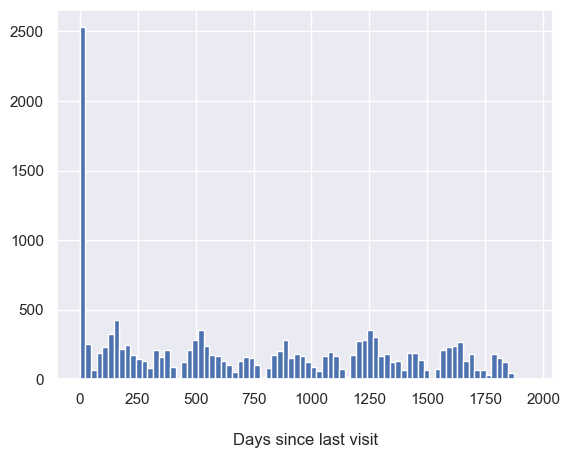

In [99]:
days_since_last_visit = []
date2_str = "2019-10-31"

for i in range(len(data)):
    
    date1 = parser.parse(str(data.loc[i,"DateLastVisit"]))
    date2 = parser.parse(str(date2_str))
    days_since_last_visit.append((date2 - date1).days)
    
plt.hist(days_since_last_visit, bins=80)  
plt.title("Days since last visit", y=-0.2)
plt.show()

In [100]:
# easier to work with number of days rather than a date

data = data.drop(["DateLastVisit"], axis=1)
data["days_since_last_visit"] = days_since_last_visit

In [101]:
# now the same thing but for enrollment and period. We take out 2 columns with this and get rid of dates

In [102]:
enrolled_time = []
for i in range(len(data)):
    
    date1 = parser.parse(str(data.loc[i,"EnrollmentFinish"]))
    date2 = parser.parse(str(data.loc[i,"EnrollmentStart"]))
    enrolled_time.append((date1 - date2).days)


lastperiod_time = []
for i in range(len(data)):
    
    date1 = parser.parse(str(data.loc[i,"LastPeriodFinish"]))
    date2 = parser.parse(str(data.loc[i,"LastPeriodStart"]))
    lastperiod_time.append((date1 - date2).days)

In [103]:
data = data.drop(["EnrollmentStart","EnrollmentFinish","LastPeriodStart","LastPeriodFinish"], axis=1)
data["enrolled_time"] = enrolled_time
data["lastperiod_time"] = lastperiod_time

In [104]:
# make gender column numerical

gender_numerical = []
gender_function = {'Male': 0, 'Female': 1}

for gender in data["Gender"]:
    gender_numerical.append(gender_function[gender])
    
data["Gender"] = gender_numerical

In [105]:
data.head()

,Age,Gender,Income,DaysWithoutFrequency,LifetimeValue,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,TeamActivities,...,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,NumberOfReferences,Dropout,days_since_last_visit,enrolled_time,lastperiod_time
ID,,,,,,,,,,,,,,,,,,,,,
0,60,1,5500.0,1,89.35,0,0.0,0.0,1.0,0.0,...,7,NaN,6.28,2,0,0,0,1,58,183
1,29,1,2630.0,60,479.20,0,0.0,0.0,0.0,0.0,...,1,2.0,17.42,1,2,0,1,1568,398,364
2,23,0,1980.0,7,37.60,0,0.0,0.0,1.0,0.0,...,0,7.0,30.03,6,0,0,1,889,30,180
3,9,0,0.0,22,155.40,0,0.0,0.0,0.0,1.0,...,2,2.0,17.72,3,0,0,1,283,160,364
4,35,0,4320.0,210,373.20,0,0.0,0.0,1.0,0.0,...,0,7.0,60.97,0,3,0,1,721,778,180


In [106]:
data = data.astype(float)

In [107]:
data.isna().sum()

Age                             0
Gender                          0
Income                        495
DaysWithoutFrequency            0
LifetimeValue                   0
UseByTime                       0
AthleticsActivities            36
WaterActivities                37
FitnessActivities              35
TeamActivities                 35
RacketActivities               37
CombatActivities               33
SpecialActivities              44
OtherActivities                35
NumberOfFrequencies            26
AttendedClasses                 0
AllowedWeeklyVisitsBySLA      535
AllowedNumberOfVisitsBySLA      0
RealNumberOfVisits              0
NumberOfRenewals                0
NumberOfReferences              0
Dropout                         0
days_since_last_visit           0
enrolled_time                   0
lastperiod_time                 0
dtype: int64

In [108]:
# Dealing with nan values
# then check correlation matrix between parameters

In [109]:
# atribute 0 income if is nan and under 18 years old. seems fair

for index, row in data.iterrows():
    if pd.isna(row['Income']) and row["Age"] < 18:
        data.at[index,"Income"] = 0.0

In [110]:
data['Income'].isna().sum()         # very good improvement. most NaN were in this situation

132

In [111]:
# After make the same analysis to deal with nan values for the other variables.
# we can probably still drop some columns before checking the correlation metrix
# and then deal with the outliers as well

# all this is just for the first point of the guidelines pdf

In [112]:
data_neighbors_income = data.copy()
data_neighbors_income['Income'].isna().sum()

132

In [113]:
# Create age groups
bins = [0, 18, 35, 55, np.inf]  # Define age group boundaries
labels = ['Children', 'Young Adults', 'Middle-Aged', 'Seniors']
data_neighbors_income['AgeGroup'] = pd.cut(data_neighbors_income['Age'], bins=bins, labels=labels, include_lowest=True)

C:\Users\jaime\AppData\Local\Temp\ipykernel_1896\1903272434.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_neighbors_income['Income'].fillna(data_neighbors_income.groupby('AgeGroup')['Income'].transform('mean'), inplace=True)


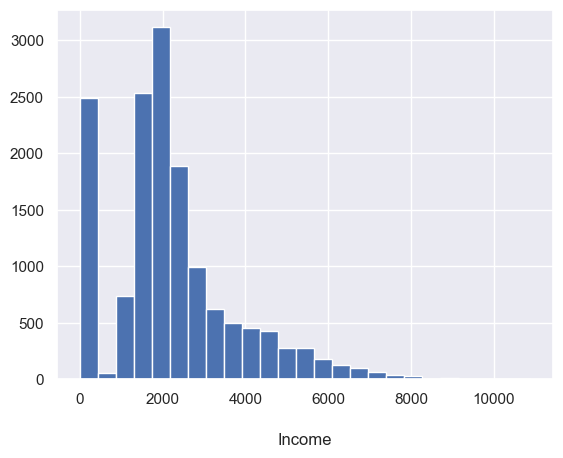

In [114]:
data_neighbors_income['Income'].fillna(data_neighbors_income.groupby('AgeGroup')['Income'].transform('mean'), inplace=True)

plt.hist(data_neighbors_income["Income"], bins=25)  
plt.title("Income", y=-0.2)
plt.show()

In [115]:
# "AllowedWeeklyVisitsBySLA" doesn't offer more information than "AllowedNumberOfVisitsBySLA". It's just in a smaller time frame
# the service hired and "lastperiod_time" are the same, the two variables are proportional

# so we can drop "AllowedWeeklyVisitsBySLA". Makes sense?

In [116]:
data_neighbors_income = data_neighbors_income.drop(["AllowedWeeklyVisitsBySLA"], axis=1)

In [117]:
# "NumberOfFrequencies" has very few nan so going to fill with the mean of all values.
# probably not the best but for now will do

In [118]:
mean_frequencies = data_neighbors_income["NumberOfFrequencies"].mean()

In [119]:
data_neighbors_income["NumberOfFrequencies"].fillna(mean_frequencies, inplace=True)

In [120]:
data = data_neighbors_income
data.head(8)

,Age,Gender,Income,DaysWithoutFrequency,LifetimeValue,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,TeamActivities,...,AttendedClasses,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,NumberOfReferences,Dropout,days_since_last_visit,enrolled_time,lastperiod_time,AgeGroup
ID,,,,,,,,,,,,,,,,,,,,,
0,60.0,1.0,5500.0,1.0,89.35,0.0,0.0,0.0,1.0,0.0,...,7.0,6.28,2.0,0.0,0.0,0.0,1.0,58.0,183.0,Seniors
1,29.0,1.0,2630.0,60.0,479.20,0.0,0.0,0.0,0.0,0.0,...,1.0,17.42,1.0,2.0,0.0,1.0,1568.0,398.0,364.0,Young Adults
2,23.0,0.0,1980.0,7.0,37.60,0.0,0.0,0.0,1.0,0.0,...,0.0,30.03,6.0,0.0,0.0,1.0,889.0,30.0,180.0,Young Adults
3,9.0,0.0,0.0,22.0,155.40,0.0,0.0,0.0,0.0,1.0,...,2.0,17.72,3.0,0.0,0.0,1.0,283.0,160.0,364.0,Children
4,35.0,0.0,4320.0,210.0,373.20,0.0,0.0,0.0,1.0,0.0,...,0.0,60.97,0.0,3.0,0.0,1.0,721.0,778.0,180.0,Young Adults
5,24.0,1.0,2220.0,3.0,140.00,0.0,0.0,0.0,1.0,0.0,...,0.0,59.01,26.0,0.0,0.0,1.0,1190.0,243.0,365.0,Young Adults
6,23.0,0.0,2340.0,16.0,143.50,0.0,0.0,0.0,1.0,0.0,...,0.0,30.03,3.0,3.0,0.0,1.0,219.0,1283.0,180.0,Young Adults
7,23.0,0.0,1910.0,99.0,233.90,1.0,0.0,0.0,1.0,0.0,...,0.0,60.97,11.0,5.0,0.0,1.0,191.0,1589.0,180.0,Young Adults


In [121]:
data.isna().sum()

Age                            0
Gender                         0
Income                         0
DaysWithoutFrequency           0
LifetimeValue                  0
UseByTime                      0
AthleticsActivities           36
WaterActivities               37
FitnessActivities             35
TeamActivities                35
RacketActivities              37
CombatActivities              33
SpecialActivities             44
OtherActivities               35
NumberOfFrequencies            0
AttendedClasses                0
AllowedNumberOfVisitsBySLA     0
RealNumberOfVisits             0
NumberOfRenewals               0
NumberOfReferences             0
Dropout                        0
days_since_last_visit          0
enrolled_time                  0
lastperiod_time                0
AgeGroup                       0
dtype: int64

In [122]:
# above are the amount of 1 for each activity (14 942 rows). objective is to maintain the ratios of 0 to 1 in each activity

In [123]:
# Athletics -> 0.74 % -> fill with 0
# Water -> 29.5 %   -> eleven 1, rest 0
# Fitness -> 0.57 %  -> fill with 0
# Team -> 5.54 %     -> two 1, rest 0
# Racket -> 2.33 %   -> only one 1
# Combat -> 10.77 %   -> three 1, rest 0
# Special -> 2.64 %  -> only one 1, rest 0
# Other -> 0.19 %   -> fill with 0

# fill in random positions for the indexes of Nan for each activity

In [124]:
data['AthleticsActivities'].fillna(0, inplace=True)
nan_indexes_Water = data[data['WaterActivities'].isna()].index
data['FitnessActivities'].fillna(0, inplace=True)
nan_indexes_Team = data[data['TeamActivities'].isna()].index
nan_indexes_Racket = data[data['RacketActivities'].isna()].index
nan_indexes_Combat = data[data['CombatActivities'].isna()].index
nan_indexes_Special = data[data['SpecialActivities'].isna()].index
data['OtherActivities'].fillna(0, inplace=True)

In [125]:
fill_values_Water = [1]*11  + [0]*(len(nan_indexes_Water) - 11)
np.random.shuffle(fill_values_Water)
data.loc[nan_indexes_Water, 'WaterActivities'] = fill_values_Water

fill_values_Team = [1]*2  + [0]*(len(nan_indexes_Team) - 2)
np.random.shuffle(fill_values_Team)
data.loc[nan_indexes_Team, 'TeamActivities'] = fill_values_Team

fill_values_Racket = [1]*1  + [0]*(len(nan_indexes_Racket) - 1)
np.random.shuffle(fill_values_Racket)
data.loc[nan_indexes_Racket, 'RacketActivities'] = fill_values_Racket

fill_values_Combat = [1]*3  + [0]*(len(nan_indexes_Combat) - 3)
np.random.shuffle(fill_values_Combat)
data.loc[nan_indexes_Combat, 'CombatActivities'] = fill_values_Combat

fill_values_Special = [1]*1  + [0]*(len(nan_indexes_Special) - 1)
np.random.shuffle(fill_values_Special)
data.loc[nan_indexes_Special, 'SpecialActivities'] = fill_values_Special

In [126]:
#data.isna().sum()       # no more Nan values

In [127]:
# For correlation matrix has to be numerical, AgeGroup column:

In [128]:
data = data.drop("Age", axis=1)

unique_agegroup = data["AgeGroup"].unique()
print(unique_agegroup) 

['Seniors', 'Young Adults', 'Children', 'Middle-Aged']
Categories (4, object): ['Children' < 'Young Adults' < 'Middle-Aged' < 'Seniors']


In [129]:
# 1 -> Children ; 2 -> Young Adults ; 3 -> Middle-Aged ; 4 -> Seniors

data["AgeGroup"] = data["AgeGroup"].apply(lambda x: 1 if x == "Children" else 2 if x == "Young Adults"
                                           else 3 if x == "Middle-Aged" else 4 if x =="Seniors" else x)

In [ ]:
   ### OUTLIERS ### OUTLIERS ### OUTLIERS ### OUTLIERS

In [134]:
data.describe(include="all").T


# Features that seem weird (for outliers):  (Analyze these ones to set cut of points)

# - Income
# - DaysWithoutFrequency
# - LifetimeValue
# - NumberofFrequencies
# - AttendedClasses
# - AllowedNumberOfVisitsBySLA
# - RealNumberOfVisits
# - enrolled_time

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Gender,14942.0,NaN,NaN,NaN,0.597711,0.490376,0.00,0.00,1.00,1.000,1.00
Income,14942.0,NaN,NaN,NaN,2180.336950,1581.859742,0.00,1420.00,1970.00,2760.000,10890.00
DaysWithoutFrequency,14942.0,NaN,NaN,NaN,81.224936,144.199576,0.00,13.00,41.00,83.750,1745.00
LifetimeValue,14942.0,NaN,NaN,NaN,302.561871,364.319566,0.00,83.60,166.20,355.075,6727.80
UseByTime,14942.0,NaN,NaN,NaN,0.047116,0.211893,0.00,0.00,0.00,0.000,1.00
AthleticsActivities,14942.0,NaN,NaN,NaN,0.007362,0.085487,0.00,0.00,0.00,0.000,1.00
WaterActivities,14942.0,NaN,NaN,NaN,0.296212,0.456601,0.00,0.00,0.00,1.000,1.00
FitnessActivities,14942.0,NaN,NaN,NaN,0.574689,0.494407,0.00,0.00,1.00,1.000,1.00
TeamActivities,14942.0,NaN,NaN,NaN,0.055548,0.229055,0.00,0.00,0.00,0.000,1.00
RacketActivities,14942.0,NaN,NaN,NaN,0.023424,0.151251,0.00,0.00,0.00,0.000,1.00


In [135]:
   ### MAKE ANALYSIS HERE ### MAKE ANALYSIS HERE ### MAKE ANALYSIS HERE ### MAKE ANALYSIS HERE ### 

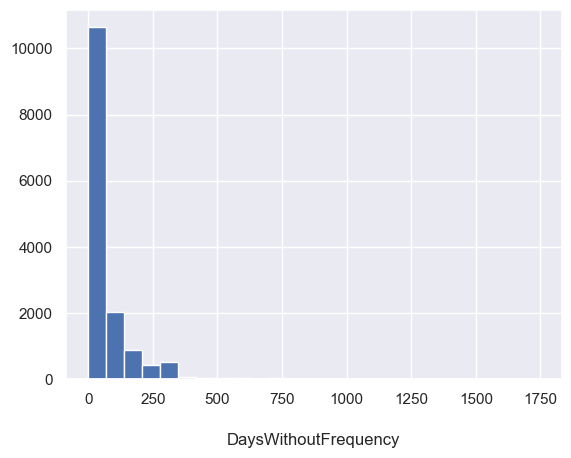

In [149]:
plt.hist(data["DaysWithoutFrequency"], bins=25)  
plt.title("DaysWithoutFrequency", y=-0.2)
plt.show()

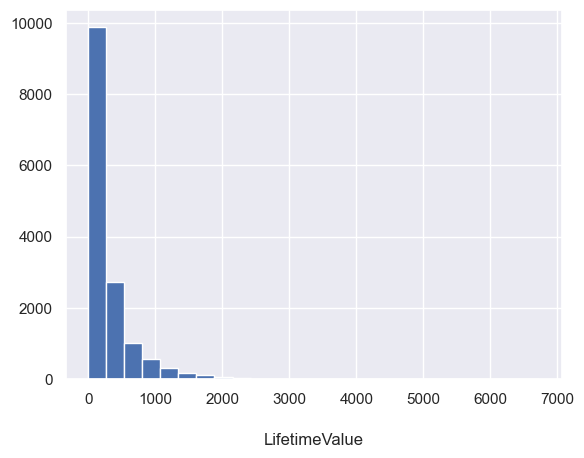

In [150]:
plt.hist(data["LifetimeValue"], bins=25)  
plt.title("LifetimeValue", y=-0.2)
plt.show()

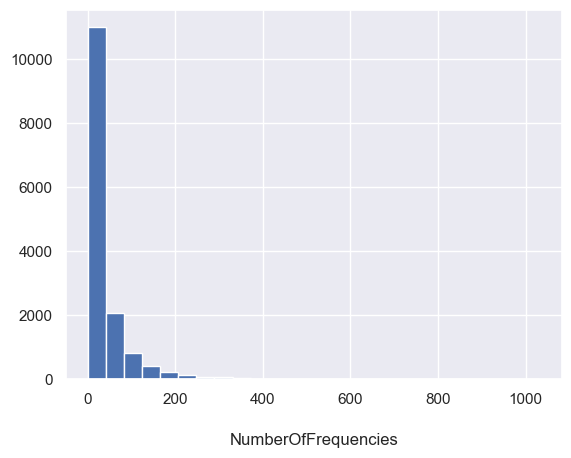

In [152]:
plt.hist(data["NumberOfFrequencies"], bins=25)  
plt.title("NumberOfFrequencies", y=-0.2)
plt.show()

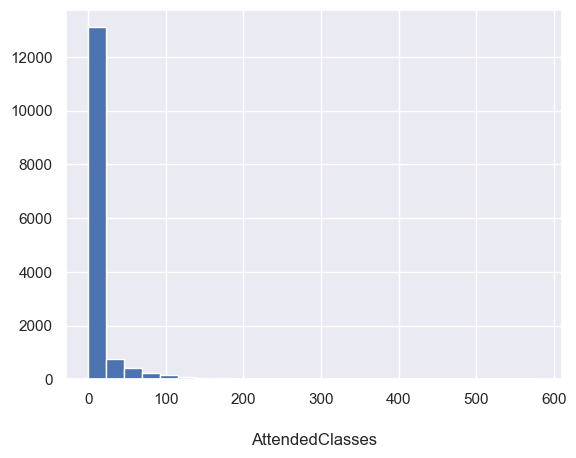

In [153]:
plt.hist(data["AttendedClasses"], bins=25)  
plt.title("AttendedClasses", y=-0.2)
plt.show()

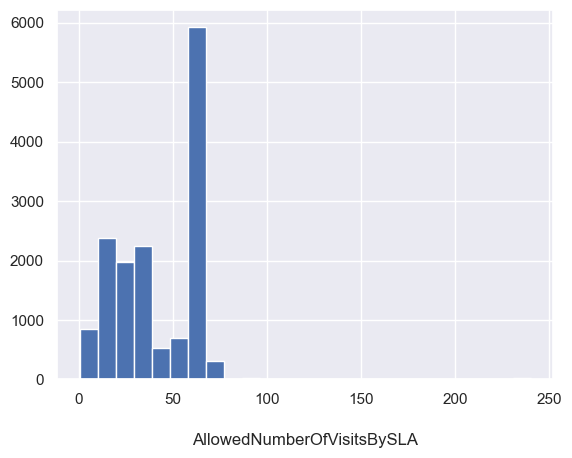

In [154]:
plt.hist(data["AllowedNumberOfVisitsBySLA"], bins=25)  
plt.title("AllowedNumberOfVisitsBySLA", y=-0.2)
plt.show()           # this one is a bit weird, not ideal data

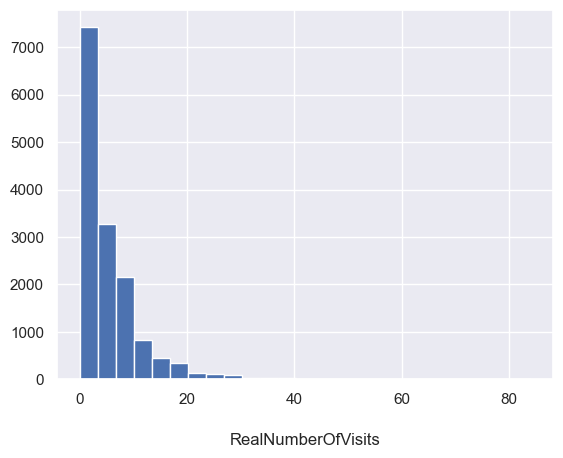

In [155]:
plt.hist(data["RealNumberOfVisits"], bins=25)  
plt.title("RealNumberOfVisits", y=-0.2)
plt.show()

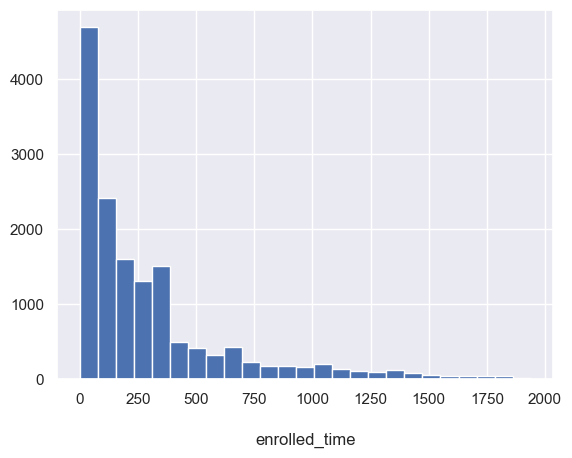

In [156]:
plt.hist(data["enrolled_time"], bins=25)  
plt.title("enrolled_time", y=-0.2)
plt.show()

In [136]:
# Removing outliers 'by hand':

In [174]:
data_1 = data.copy()

filters1 = (
    (data_1["Income"] < 9000)          # histogram above somewhere
    & (data_1["DaysWithoutFrequency"] < 500)
    & (data_1["LifetimeValue"] < 2500)
    & (data_1["NumberOfFrequencies"] < 350)
    & (data_1["AttendedClasses"] < 170)
    & (data_1["AllowedNumberOfVisitsBySLA"] < 85)
    & (data_1["RealNumberOfVisits"] < 38)
    & (data_1["enrolled_time"] < 1800)
)

data_1 = data[filters1]

print('Percentage of data kept after removing outliers:', np.round(data_1.shape[0] / data.shape[0], 4))

Percentage of data kept after removing outliers: 0.9595


In [175]:
# data kept should be like at least like 96%, teacher said in class. Extending the values so that that parameter is met

In [176]:
data = data_1

In [177]:
# Using the IQR method (more brute force):  (data is not changed)

In [178]:
data_2 = data.copy()

features_chosen = ["Income","DaysWithoutFrequency","LifetimeValue","NumberOfFrequencies","AttendedClasses",
                  "AllowedNumberOfVisitsBySLA","RealNumberOfVisits","enrolled_time"]

# Calculate Q1, Q3, IQR
q25 = data[features_chosen].quantile(.25)
q75 = data[features_chosen].quantile(.75)
iqr = q75 - q25

# Compute upper and lower limit
upper_lim = q75 + 1.5*iqr
lower_lim = q25 - 1.5*iqr


filters2 = []
for features in features_chosen:
    llim = lower_lim[features]
    ulim = upper_lim[features]
    filters2.append(data[features].between(llim, ulim, inclusive='both'))

filters2 = np.all(filters2, 0)
data_2 = data[filters2]

print('Percentage of data kept after removing outliers:', np.round(data_2.shape[0] / data.shape[0], 4))

Percentage of data kept after removing outliers: 0.556


In [179]:
# 45 % of data removed. So that's a no no. Have to do a more in depth analysis, above #

In [180]:
   ### CORRELATION MATRIX ### CORRELATION MATRIX ### CORRELATION MATRIX ###

In [181]:
data.corr()

,Gender,Income,DaysWithoutFrequency,LifetimeValue,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,TeamActivities,RacketActivities,...,AttendedClasses,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,NumberOfReferences,Dropout,days_since_last_visit,enrolled_time,lastperiod_time,AgeGroup
Gender,1.000000,0.030821,0.034895,-0.081125,-0.034454,-0.024129,-0.001344,0.104292,-0.092446,-0.021809,...,-0.018685,-0.018868,-0.057390,-0.064847,-0.000106,0.027593,0.044677,-0.038021,-0.011974,0.045812
Income,0.030821,1.000000,0.025238,-0.107552,0.076317,0.006241,-0.221653,0.269392,-0.141288,-0.026446,...,-0.220346,0.279108,0.099316,-0.026522,-0.098736,0.058611,0.027398,0.029239,-0.004309,0.853054
DaysWithoutFrequency,0.034895,0.025238,1.000000,-0.099525,0.095788,0.013135,-0.061174,0.000133,0.042358,0.033054,...,-0.107782,-0.011405,-0.280831,0.074046,0.033932,0.216748,0.461242,0.193234,0.043505,0.032767
LifetimeValue,-0.081125,-0.107552,-0.099525,1.000000,0.032588,-0.004386,0.370902,-0.308356,0.118238,0.031923,...,0.684040,-0.161158,0.053723,0.709971,0.189602,-0.328771,-0.332542,0.317230,-0.004581,-0.144264
UseByTime,-0.034454,0.076317,0.095788,0.032588,1.000000,0.009161,-0.008027,0.065916,-0.028854,-0.020722,...,-0.054313,0.065340,0.042013,0.114541,-0.011232,0.106981,-0.051910,0.288688,-0.007866,0.068784
AthleticsActivities,-0.024129,0.006241,0.013135,-0.004386,0.009161,1.000000,-0.030522,-0.072293,-0.001860,-0.013093,...,-0.016532,0.022946,-0.010458,0.025348,0.010170,-0.009316,-0.026134,0.006767,-0.003505,0.012014
WaterActivities,-0.001344,-0.221653,-0.061174,0.370902,-0.008027,-0.030522,1.000000,-0.617471,-0.075026,-0.079852,...,0.409279,-0.319105,-0.050875,0.215715,0.127757,-0.186484,-0.200533,0.067479,0.051474,-0.245838
FitnessActivities,0.104292,0.269392,0.000133,-0.308356,0.065916,-0.072293,-0.617471,1.000000,-0.243652,-0.147574,...,-0.355701,0.317856,0.166909,-0.131036,-0.106163,0.160406,0.119793,0.004212,-0.137143,0.312523
TeamActivities,-0.092446,-0.141288,0.042358,0.118238,-0.028854,-0.001860,-0.075026,-0.243652,1.000000,-0.010390,...,0.101768,-0.139327,-0.095350,0.088958,0.029964,-0.063815,-0.070772,0.033721,0.024738,-0.188190
RacketActivities,-0.021809,-0.026446,0.033054,0.031923,-0.020722,-0.013093,-0.079852,-0.147574,-0.010390,1.000000,...,0.082613,-0.166535,-0.038427,-0.022775,0.018182,0.063664,0.157183,0.014699,0.113218,-0.039223


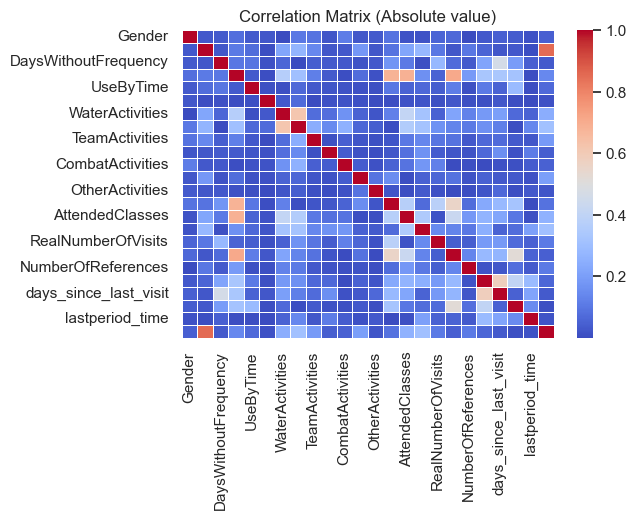

In [182]:
corr_matrix = np.abs(data.corr())

# Create a heatmap using Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix (Absolute value)")
plt.show()

In [ ]:
# Remove irrelevant features